# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:** 10

**Author 1 (sciper):** Badr Larhdir (283205)  
**Author 2 (sciper):** Joe Najm (301560)   
**Author 3 (sciper):** Sébastien Jeanfavre (269551)  

**Release date:** 07.04.2022
**Due date:** 29.04.2022


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

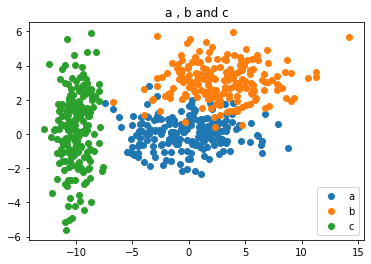

In [3]:
# Add your implementation and discussion

import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])
plt.scatter(c[:,0],c[:,1])
plt.title("a , b and c")
plt.legend(["a","b","c"])

By looking at the data, we can estimate the distribution of the data as being 3 gaussians (one for each class). Indeed, we can now estimate the mean and variance of each class.

In [4]:
mu_a = np.round(np.mean(a,axis=0))
mu_b = np.round(np.mean(b,axis=0))
mu_c = np.round(np.mean(c,axis=0))

print(f"Mean of class a : {mu_a}")
print(f"Mean of class b : {mu_b}")
print(f"Mean of class c : {mu_c}")

sigma_a = np.round(np.cov(a.T))
sigma_b = np.round(np.cov(b.T))
sigma_c = np.round(np.cov(c.T))

print("Variance of class a : ")
print(sigma_a)
print("Variance of class b : ")
print(sigma_b)
print("Variance of class c : ")
print(sigma_c)


# Create a grid for all the points
x1 = np.linspace(-15,15,300)
x2 = np.linspace(-6,6,300)

Mean of class a : [-0.  0.]
Mean of class b : [3. 3.]
Mean of class c : [-10.   0.]
Variance of class a : 
[[10.  0.]
 [ 0.  1.]]
Variance of class b : 
[[10.  0.]
 [ 0.  1.]]
Variance of class c : 
[[1. 0.]
 [0. 5.]]


In [5]:
# Compute the bayes discriminant function on all the data poin
def bayes_discriminant(x1, x2, mean, covariance):
    inv_cov = np.linalg.inv(covariance)
    g = np.zeros((len(x1),len(x2)))
    for i, a in enumerate(x1):
        for j, b in enumerate(x2):
            x = np.array([[a, b]]).T
            g[i, j] = -1/2 * (x-mean).T @ inv_cov @ (x-mean)
            + np.log(1/3) + np.log(1/(2 * np.pi * (np.linalg.det(covariance)) ** 0.5))
    return g

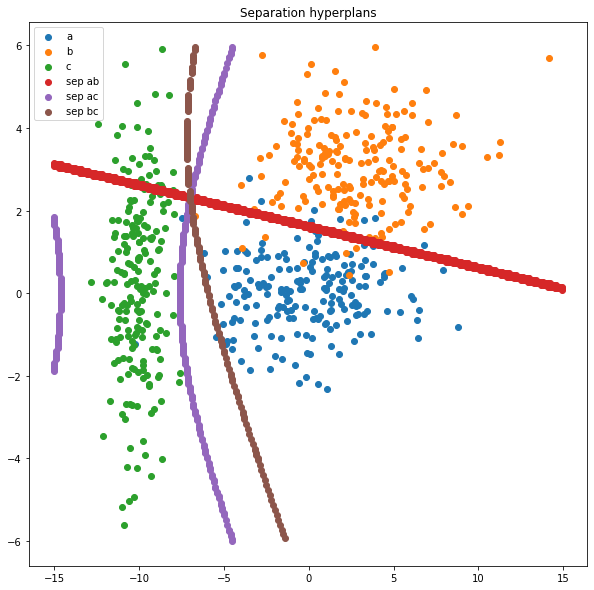

In [6]:
#Find discriminant function for each class
g_a = bayes_discriminant(x1, x2, mu_a[:,np.newaxis], sigma_a)
g_b = bayes_discriminant(x1, x2, mu_b[:,np.newaxis], sigma_b)
g_c = bayes_discriminant(x1, x2, mu_c[:,np.newaxis], sigma_c)

# Compute difference between each discriminant to find the zeros
separator_ab = g_a - g_b
separator_ac = g_a - g_c
separator_bc = g_b - g_c


#Find where the difference between the discriminant functions is smaller than a small epsilon
epsilon = 0.15
idx_ab = np.where(abs(separator_ab) <= epsilon)
idx_ac = np.where(abs(separator_ac) <= epsilon)
idx_bc = np.where(abs(separator_bc) <= epsilon)

plt.figure(figsize=(10,10))
plt.scatter(a[:,0],a[:,1], label="a")
plt.scatter(b[:,0],b[:,1], label="b")
plt.scatter(c[:,0],c[:,1], label="c")
plt.scatter((idx_ab[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(idx_ab[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="sep ab")
plt.scatter((idx_ac[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(idx_ac[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="sep ac")
plt.scatter((idx_bc[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(idx_bc[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="sep bc")
plt.title("Separation hyperplans")
plt.legend()

We can see a clear separation between the 3 classes, we can even try to define the areas where each point of grid would be classified. To do so, we assign to each point of the grid to the class that belongs to the largest dicriminant value at the given point.

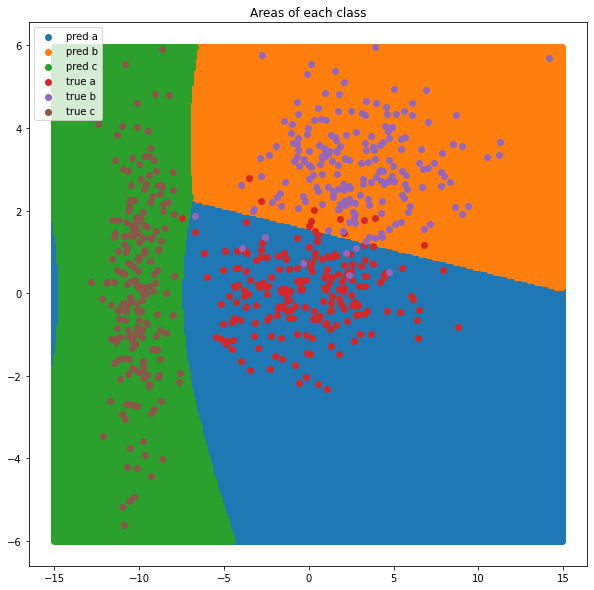

In [7]:
area_a = np.where((g_a >= g_b) & (g_a >= g_c))
area_b = np.where((g_b > g_a) & (g_b > g_c))
area_c = np.where((g_c >= g_b) & (g_c > g_a))

plt.figure(figsize=(10,10))
plt.title("Areas of each class")
plt.scatter((area_a[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(area_a[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred a")
plt.scatter((area_b[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(area_b[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred b")
plt.scatter((area_c[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(area_c[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred c")
plt.scatter(a[:,0],a[:,1], label="true a")
plt.scatter(b[:,0],b[:,1], label="true b")
plt.scatter(c[:,0],c[:,1], label="true c")
plt.legend()

We notice that both methods yield to similar results in term of classification. Moreover, by looking at the original data, the classification output makes sense as we can see that the data actually falls in the good areas. 

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

In [8]:
#Define the discriminant function based on the mahalanobis distance 
def mahalanobis(x1, x2, mu, sigma):
    d = np.zeros((len(x1),len(x2)))
    for i, a in enumerate(x1):
        for j, b in enumerate(x2):
            x = np.array([[a, b]]).T
            d[i,j] = ((x - mu).T @ np.linalg.inv(sigma) @ (x - mu))**0.5
    return d

In [9]:
da = mahalanobis(x1, x2, mu_a[:, np.newaxis], sigma_a)
db = mahalanobis(x1, x2, mu_b[:, np.newaxis], sigma_b)

separator_ab_maha = da - db
maha_a = np.where(separator_ab_maha <= 0)
maha_b = np.where(separator_ab_maha > 0)

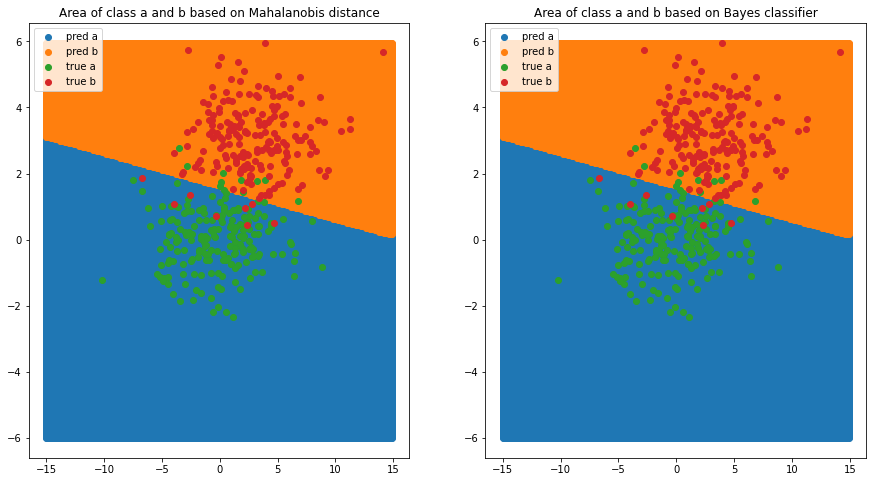

In [10]:
f = plt.figure(figsize=(15,8))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.set_title("Area of class a and b based on Mahalanobis distance")
ax1.scatter((maha_a[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(maha_a[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred a")
ax1.scatter((maha_b[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(maha_b[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred b")
ax1.scatter(a[:,0],a[:,1], label="true a")
ax1.scatter(b[:,0],b[:,1], label="true b")
ax1.legend()

area_a = np.where((g_a >= g_b))
area_b = np.where((g_b > g_a))

ax2.set_title("Area of class a and b based on Bayes classifier")
ax2.scatter((area_a[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(area_a[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred a")
ax2.scatter((area_b[0]-len(x1)/2)/(len(x1)/2)*x1[-1],(area_b[1]-len(x2)/2)/(len(x2)/2)*x2[-1], label="pred b")
ax2.scatter(a[:,0],a[:,1], label="true a")
ax2.scatter(b[:,0],b[:,1], label="true b")
ax2.legend()

We can conclude that classifying using the Mahalanobis distance shows similar result as the Bayes classifier (between two classes).

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [11]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [12]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

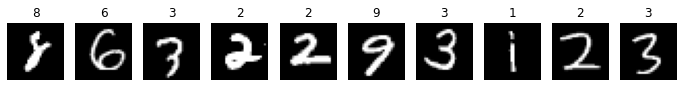

In [13]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=100,
    alpha=1e-4,
    solver="adam",
    verbose=10,
    random_state=1,
    learning_rate_init=3e-4,
)

train_images = train_images.reshape((60000,784))
test_images = test_images.reshape((10000,784))


clf.fit(train_images, train_labels)
clf.predict(test_images)

print('Accuracy = {}'.format(clf.score(test_images, test_labels)))

Iteration 1, loss = 3.03151831
Iteration 2, loss = 1.22375957
Iteration 3, loss = 0.88867195
Iteration 4, loss = 0.69074764
Iteration 5, loss = 0.55517083
Iteration 6, loss = 0.44977096
Iteration 7, loss = 0.36878110
Iteration 8, loss = 0.31404031
Iteration 9, loss = 0.25575982
Iteration 10, loss = 0.21822828
Iteration 11, loss = 0.19802876
Iteration 12, loss = 0.15627012
Iteration 13, loss = 0.14206284
Iteration 14, loss = 0.12282407
Iteration 15, loss = 0.11532764
Iteration 16, loss = 0.10439112
Iteration 17, loss = 0.08526118
Iteration 18, loss = 0.07942159
Iteration 19, loss = 0.07534125
Iteration 20, loss = 0.07607426
Iteration 21, loss = 0.05868955
Iteration 22, loss = 0.07724779
Iteration 23, loss = 0.06912636
Iteration 24, loss = 0.05397109
Iteration 25, loss = 0.05907994
Iteration 26, loss = 0.05860964
Iteration 27, loss = 0.04244212
Iteration 28, loss = 0.04954189
Iteration 29, loss = 0.05501242
Iteration 30, loss = 0.04376576
Iteration 31, loss = 0.04058040
Iteration 32, los

We notice that although we the training takes a bit of time, the classification is really good as we get approximately 97% accuracy for all the 10 classes. Although, the classical method using discriminant function was useful for a few classes, we do not believe that it would yield to such good results for 10 classes.